In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = 12,6  
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import pandas as pd
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data

In [2]:
heat_anom_0_2000 = xr.open_dataset("/home/tu.temple.edu/tun27673/Class/Ellinger_final_project_G2/data/heat_content_anomaly_0-2000_yearly.nc", decode_times=False)

heat_anom_0_700 = xr.open_dataset("/home/tu.temple.edu/tun27673/Class/Ellinger_final_project_G2/data/heat_content_anomaly_0-700_yearly.nc", decode_times=False)

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
thetao126 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp126' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")
thetao245 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp245' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")
thetao585 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp585' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")


volcello126 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp126' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'volcello'")
volcello245 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp245' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'volcello'")
volcello585 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp585' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'volcello'")


In [7]:
gcs = gcsfs.GCSFileSystem(token='anon')

esm4_thetao126 = thetao126.zstore.values[-1]
esm4_thetao245 = thetao245.zstore.values[-1]
esm4_thetao585 = thetao585.zstore.values[-1]
esm4_volcello126 = volcello126.zstore.values[-1]
esm4_volcello245 = volcello245.zstore.values[-1]
esm4_volcello585 = volcello585.zstore.values[-1]

In [10]:
## create a mutable-mapping-style interface to the store
mapper_esm4_thetao126 = gcs.get_mapper(esm4_thetao126)
# open the dataset using xarray and zarr
gfdl_esm4_thetao126 = xr.open_zarr(mapper_esm4_thetao126, 
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_thetao126

<xarray.DataArray 'thetao' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-c711a3a7f8391ec2c0ea53be5440bcbdthetao, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [11]:
# create a mutable-mapping-style interface to the store
mapper_esm4_thetao245 = gcs.get_mapper(esm4_thetao245)
# open the dataset using xarray and zarr
gfdl_esm4_thetao245 = xr.open_zarr(mapper_esm4_thetao245, 
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_thetao245

<xarray.DataArray 'thetao' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-b44c9e976e2e13c294e25cbd41ec6f3fthetao, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [12]:
# create a mutable-mapping-style interface to the store
mapper_esm4_thetao585 = gcs.get_mapper(esm4_thetao585)
# open the dataset using xarray and zarr
gfdl_esm4_thetao585 = xr.open_zarr(mapper_esm4_thetao585, 
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_thetao585

<xarray.DataArray 'thetao' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-65ed3c0681790e1a6228300bf5a1d948thetao, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [13]:
# create a mutable-mapping-style interface to the store
mapper_esm4_volcello126 = gcs.get_mapper(esm4_volcello126)
# open the dataset using xarray and zarr
gfdl_esm4_volcello126 = xr.open_zarr(mapper_esm4_volcello126, 
                                consolidated=True,use_cftime=True).volcello.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_volcello126

<xarray.DataArray 'volcello' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-97e31ccc1029ec29ec0b22afafbf4d9dvolcello, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(27, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Grid-Cell Volume
    original_name:  volcello
    standard_name:  ocean_volume
    units:          m3

In [14]:
# create a mutable-mapping-style interface to the store
mapper_esm4_volcello245 = gcs.get_mapper(esm4_volcello245)
# open the dataset using xarray and zarr
gfdl_esm4_volcello245 = xr.open_zarr(mapper_esm4_volcello245, 
                                consolidated=True,use_cftime=True).volcello.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_volcello245

<xarray.DataArray 'volcello' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-81dd3dc57a0d503b306b4775d961bbb1volcello, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(27, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Grid-Cell Volume
    original_name:  volcello
    standard_name:  ocean_volume
    units:          m3

In [15]:
# create a mutable-mapping-style interface to the store
mapper_esm4_volcello585 = gcs.get_mapper(esm4_volcello585)
# open the dataset using xarray and zarr
gfdl_esm4_volcello585 = xr.open_zarr(mapper_esm4_volcello585, 
                                consolidated=True,use_cftime=True).volcello.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_volcello585

<xarray.DataArray 'volcello' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-fa067d97ef7881e59d84b9dfa5886a68volcello, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(27, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Grid-Cell Volume
    original_name:  volcello
    standard_name:  ocean_volume
    units:          m3

In [16]:
thetao585_K = gfdl_esm4_thetao585+273.15
thetao245_K = gfdl_esm4_thetao245+273.15
thetao126_K = gfdl_esm4_thetao126+273.15

In [84]:
def calc_ocean_heat_plot(volcello, temp_kelvin):
    rho = 1026 # kg/m3
    c_p = 3990 # J/(kg K)
    weighted_temp = volcello * temp_kelvin
    heat = weighted_temp.sum(dim=['lev'])*rho*c_p
    return heat

In [92]:
heat126_plot = calc_ocean_heat_plot(gfdl_esm4_volcello126, thetao126_K) / 10**20
heat245_plot = calc_ocean_heat_plot(gfdl_esm4_volcello245, thetao245_K) / 10**20
heat585_plot = calc_ocean_heat_plot(gfdl_esm4_volcello585, thetao585_K) / 10**20

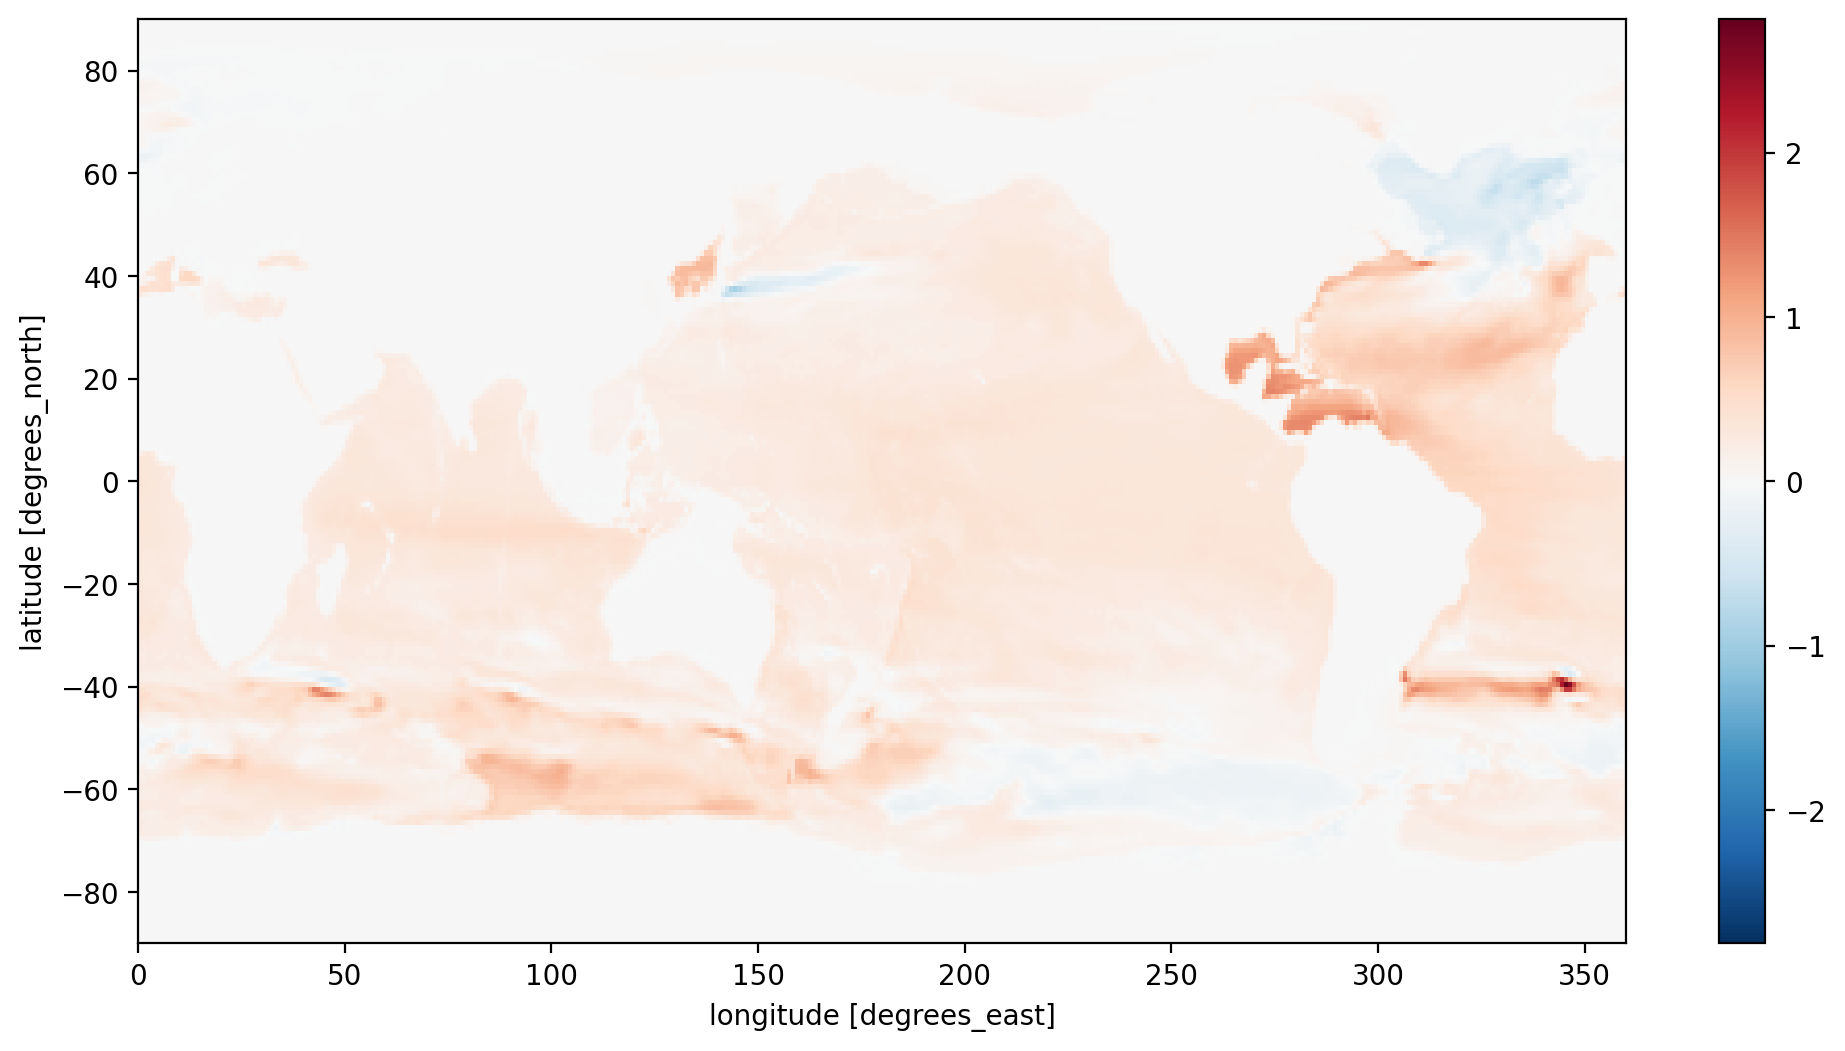

In [86]:
f20_heat_126 = heat126.sel(time=slice("2015-01-16","2034-12-16")).mean(dim='time')
l20_heat_126 = heat126.sel(time=slice("2081-01-16", "2100-12-16")).mean(dim='time')
diff_heat126 = l20_heat_126 - f20_heat_126
diff_heat126.plot()

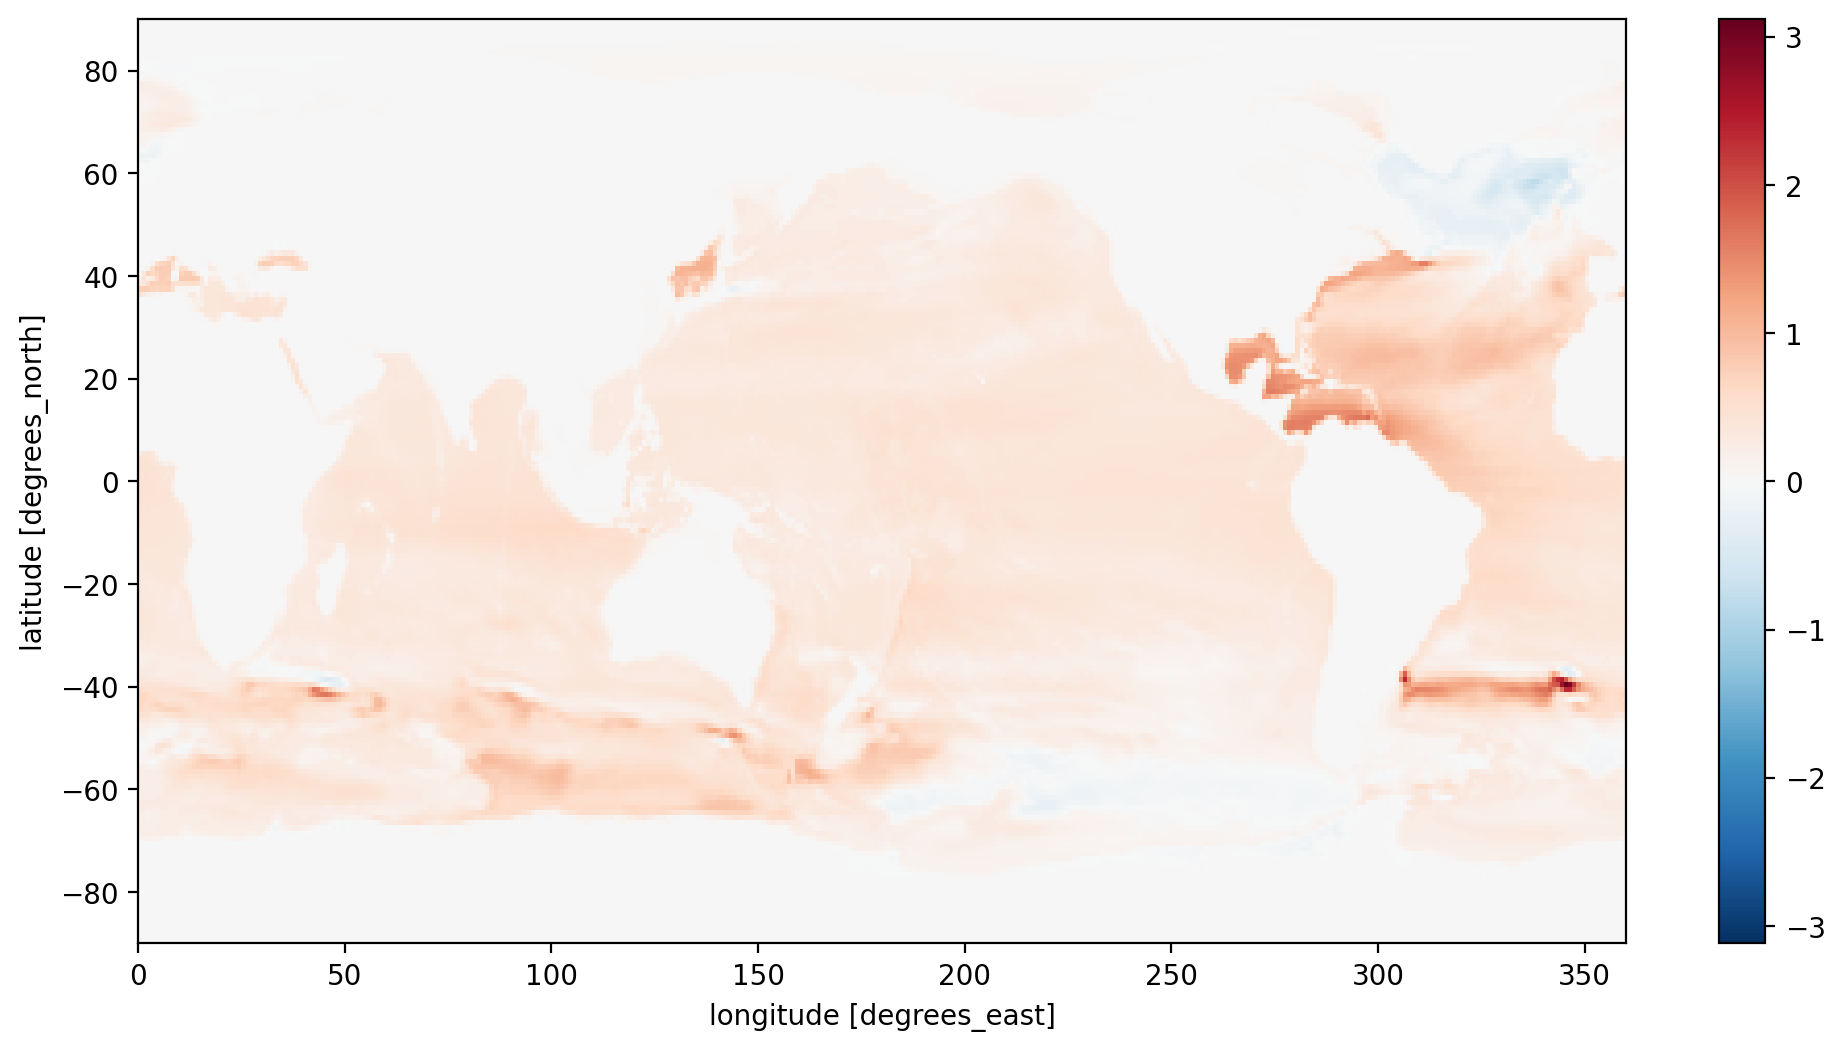

In [87]:
f20_heat_245 = heat245.sel(time=slice("2015-01-16","2034-12-16")).mean(dim='time')
l20_heat_245 = heat245.sel(time=slice("2081-01-16", "2100-12-16")).mean(dim='time')
diff_heat245 = l20_heat_245 - f20_heat_245
diff_heat245.plot()

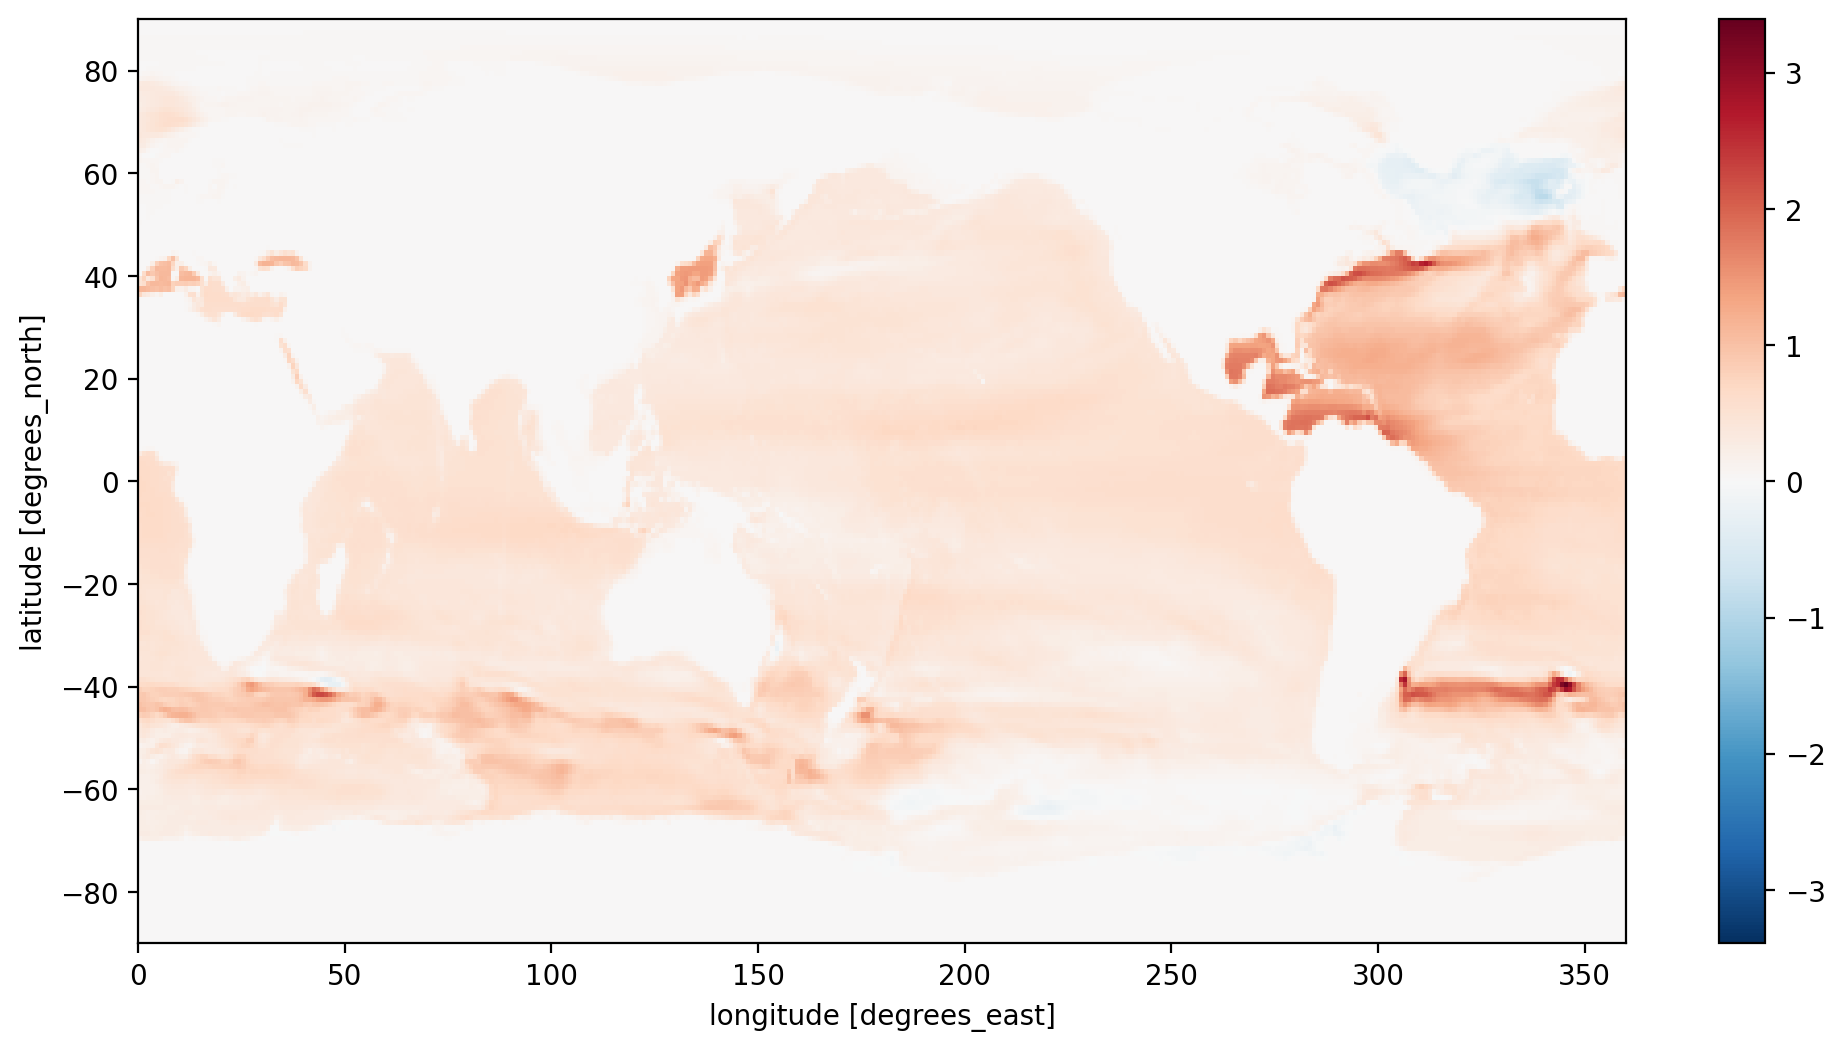

In [88]:
f20_heat_585 = heat585.sel(time=slice("2015-01-16","2034-12-16")).mean(dim='time')
l20_heat_585 = heat585.sel(time=slice("2081-01-16", "2100-12-16")).mean(dim='time')
diff_heat585 = (l20_heat_585 - f20_heat_585)
diff_heat585.plot()

Text(0.5, 1.0, 'Ocean Heat Content, SSP1-26, 10^20 J')

<Figure size 1200x800 with 0 Axes>

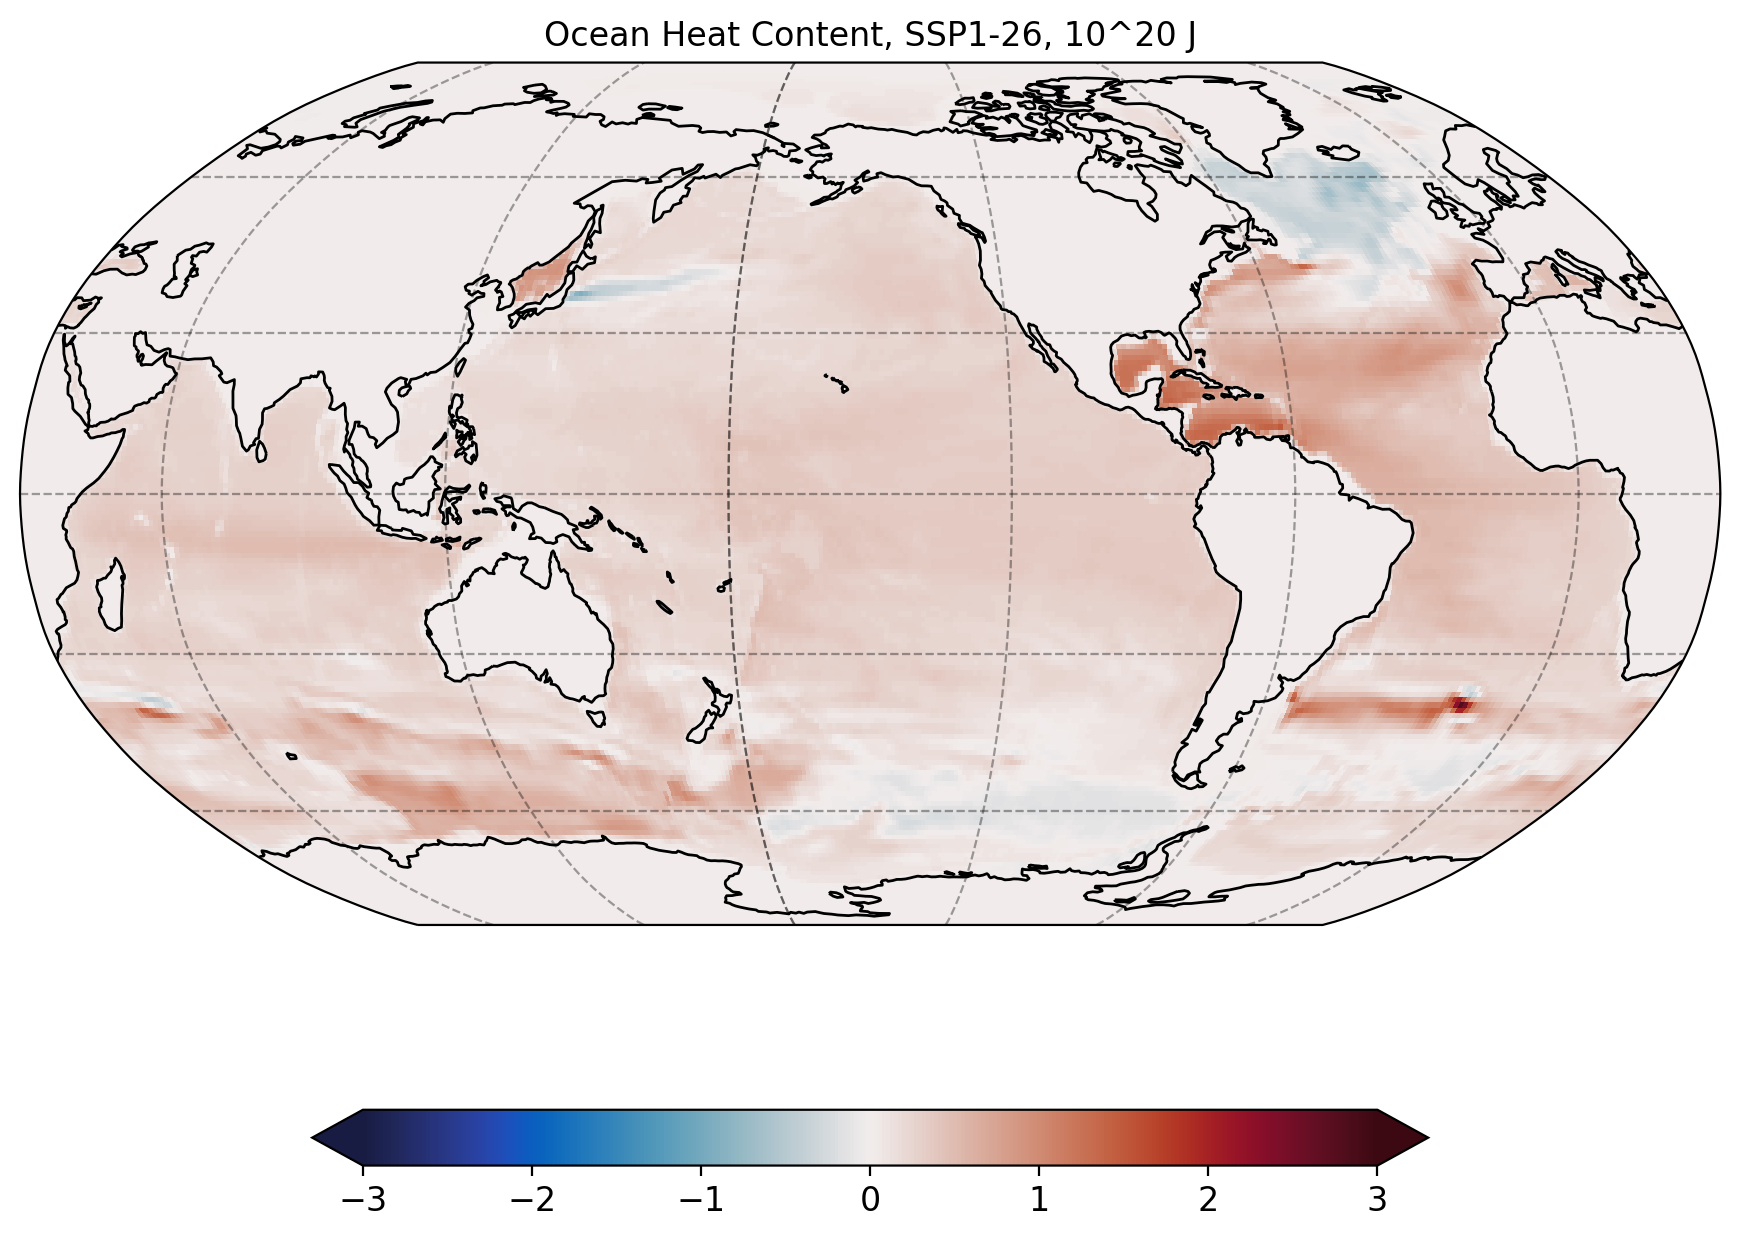

In [89]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150),
                 facecolor='grey')

plt.figure(figsize=[12,8])
p = diff_heat126.plot(x='longitude', y='latitude',
                        vmin=-3,vmax=3,
                      cmap=cmocean.cm.balance,
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[ -3, -2, -1, 0, 1, 2, 3],shrink=0.6,extend='both', orientation = "horizontal")
cb.ax.tick_params(labelsize=12)

p.axes.coastlines()
plt.title("Ocean Heat Content, SSP1-26, 10^20 J")

Text(0.5, 1.0, 'Ocean Heat Content, SSP2-45, 10^20 J')

<Figure size 1200x800 with 0 Axes>

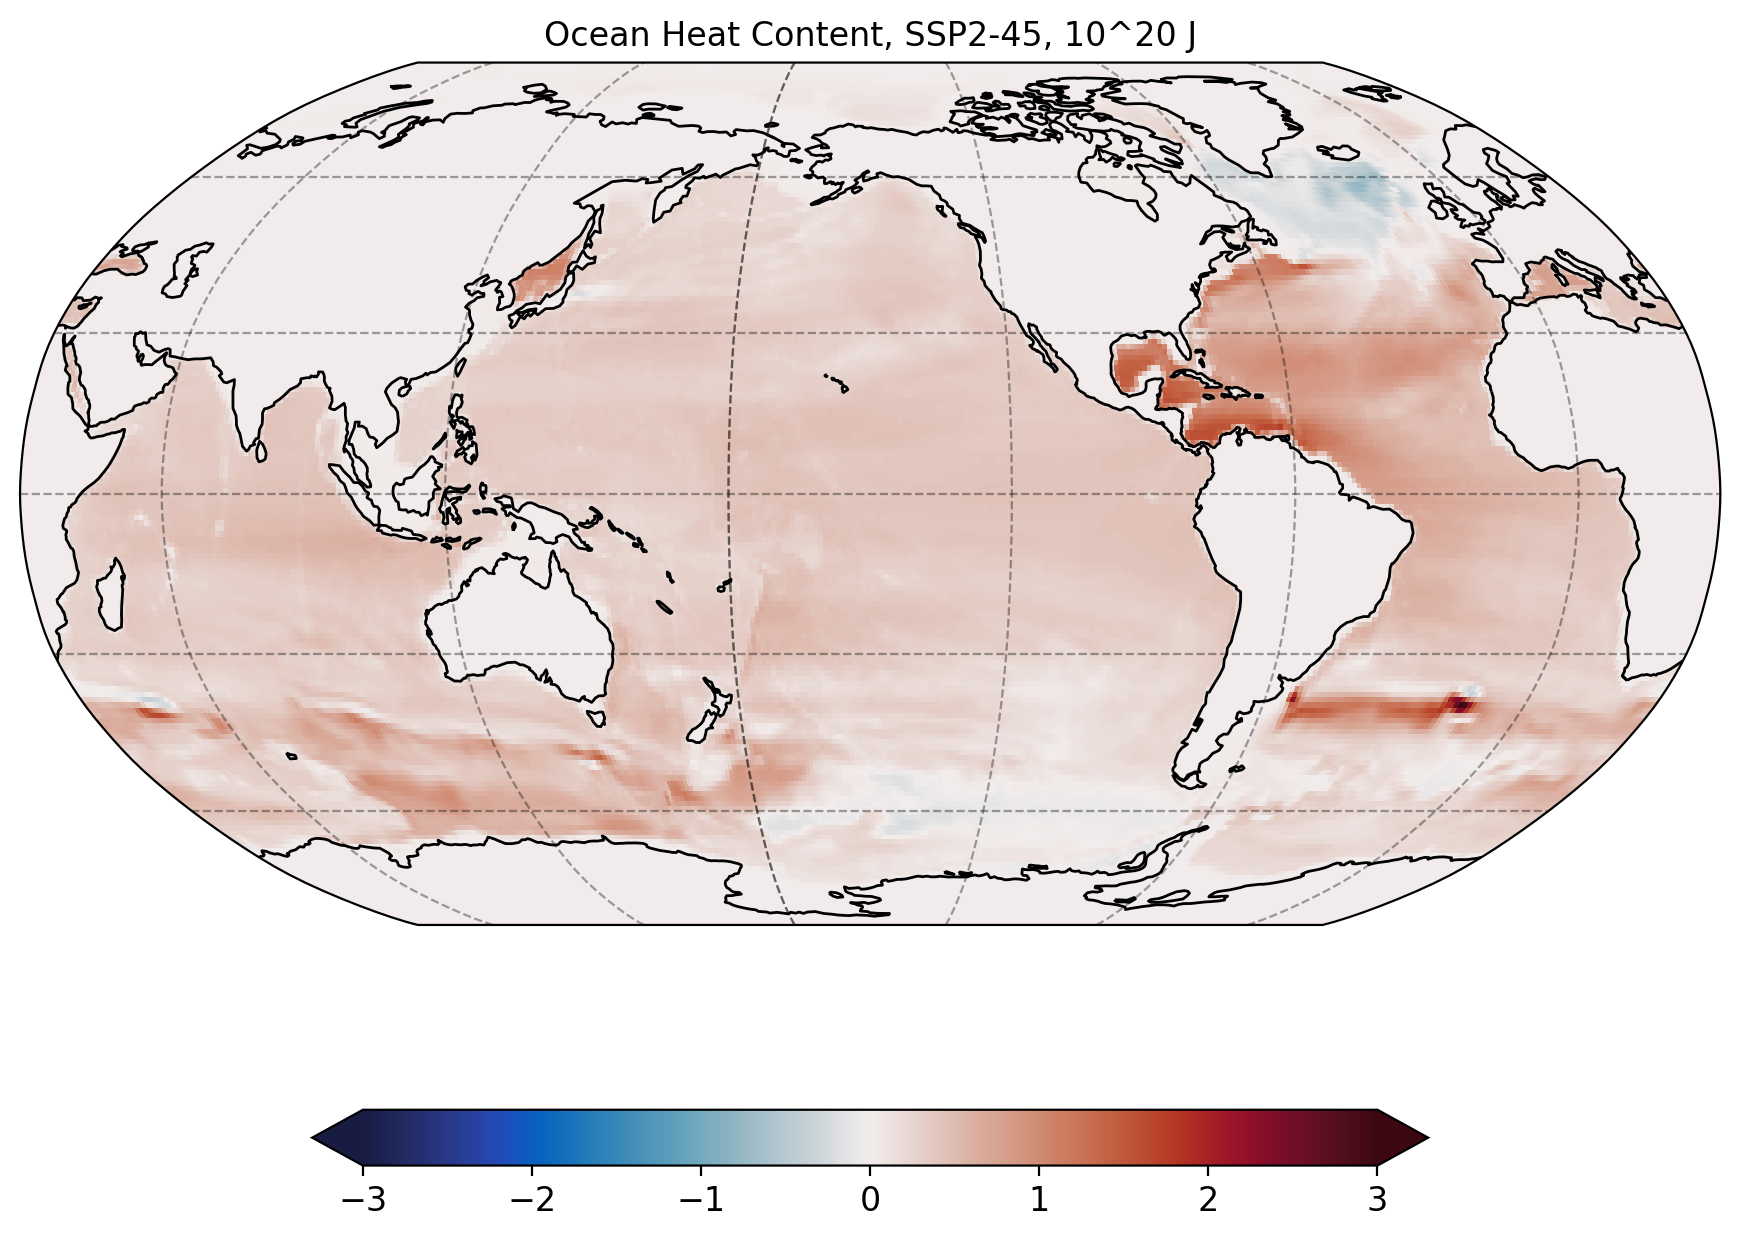

In [90]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150),
                 facecolor='grey')

plt.figure(figsize=[12,8])
p = diff_heat245.plot(x='longitude', y='latitude',
                        vmin=-3,vmax=3,
                      cmap=cmocean.cm.balance,
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[ -3, -2, -1, 0, 1, 2, 3],shrink=0.6,extend='both', orientation = "horizontal")
cb.ax.tick_params(labelsize=12)

p.axes.coastlines()
plt.title("Ocean Heat Content, SSP2-45, 10^20 J")


Text(0.5, 1.0, 'Ocean Heat Content, SSP5-85, 10^20 J')

<Figure size 1200x800 with 0 Axes>

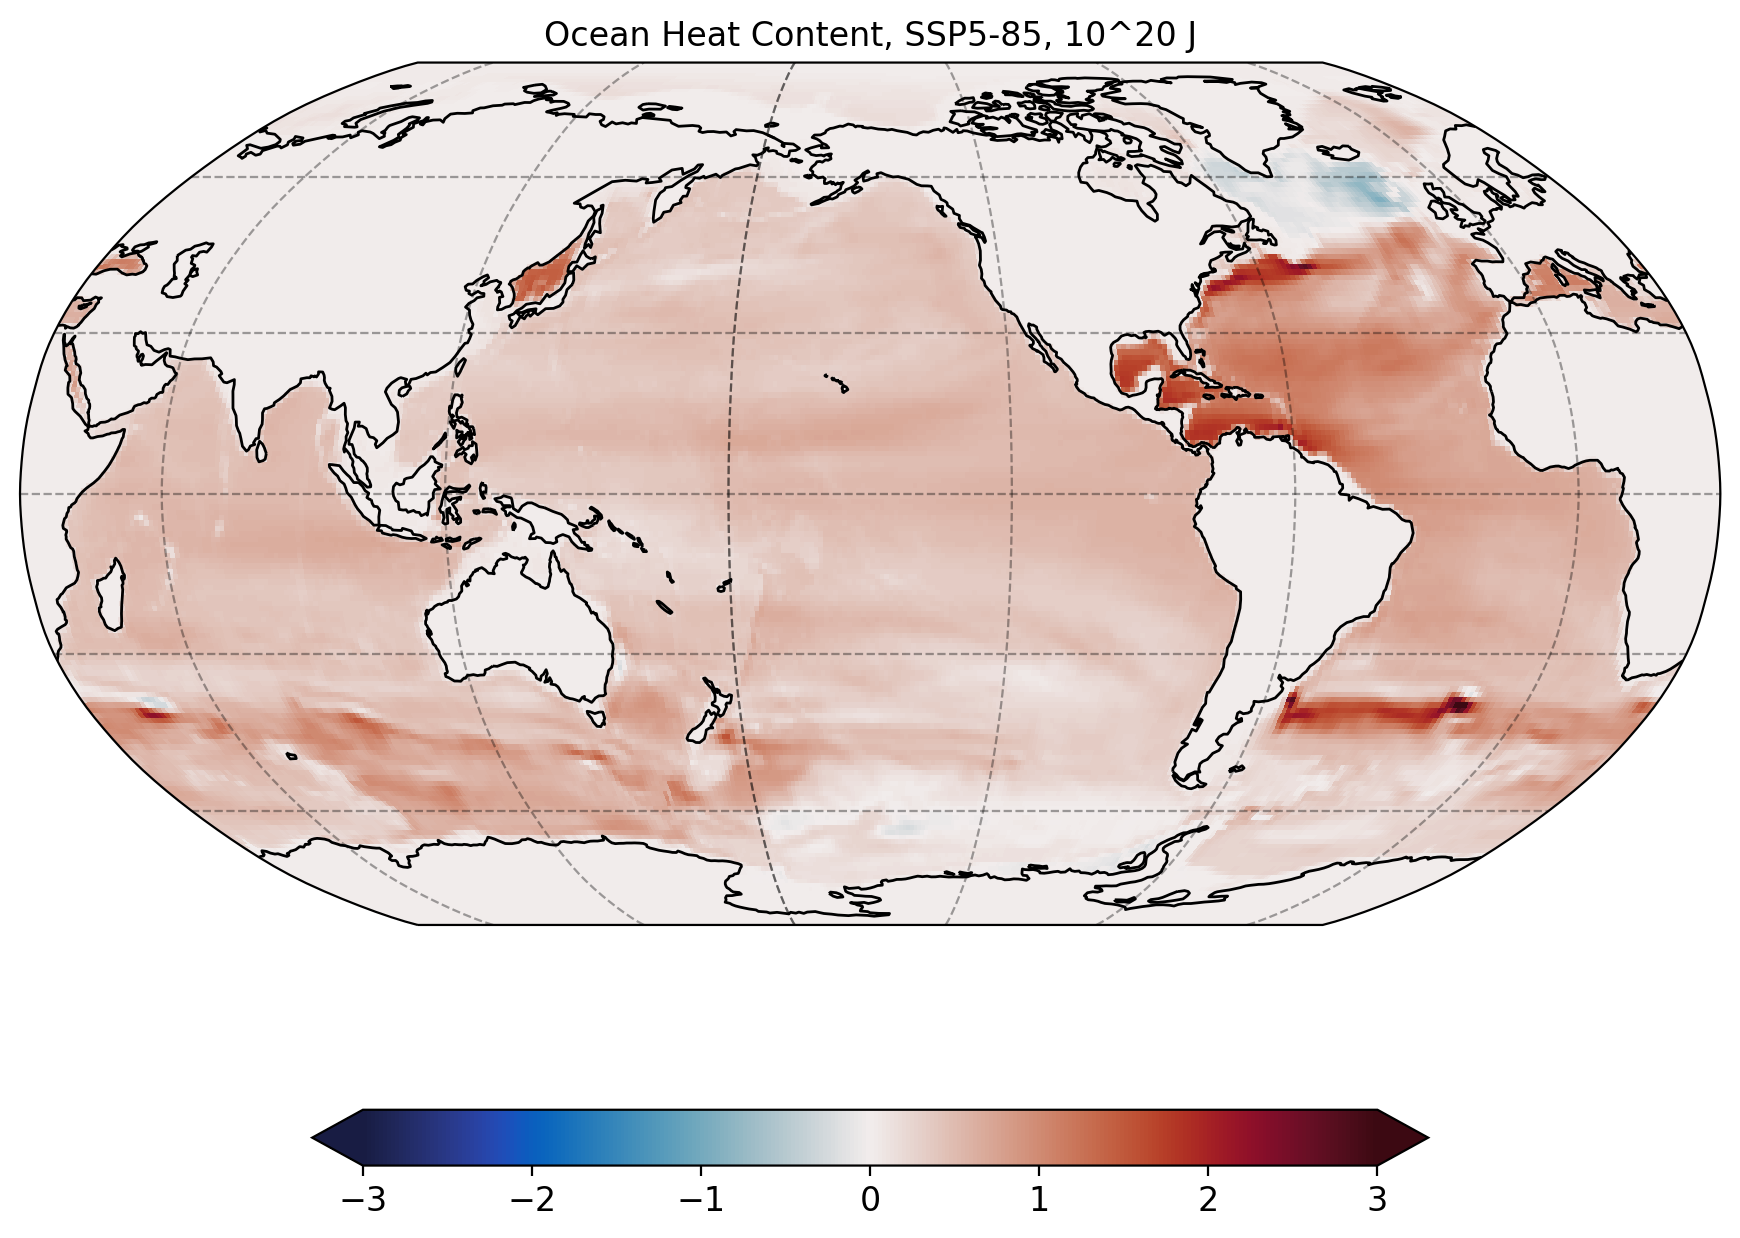

In [91]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150),
                 facecolor='grey')

plt.figure(figsize=[12,8])
p = diff_heat585.plot(x='longitude', y='latitude',
                        vmin=-3,vmax=3,
                      cmap=cmocean.cm.balance,
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[ -3, -2, -1, 0, 1, 2, 3],shrink=0.6,extend='both', orientation = "horizontal")
cb.ax.tick_params(labelsize=12)

p.axes.coastlines()
plt.title("Ocean Heat Content, SSP5-85, 10^20 J")

In [83]:
def calc_ocean_heat(volcello, temp_kelvin):
    rho = 1026 # kg/m3
    c_p = 3990 # J/(kg K)
    weighted_temp = volcello * temp_kelvin
    heat = weighted_temp.sum(dim=['latitude', 'longitude'])*rho*c_p
    return heat

In [ ]:
heat126 = calc_ocean_heat(gfdl_esm4_volcello126, thetao126_K) / 10**20
heat245 = calc_ocean_heat(gfdl_esm4_volcello245, thetao245_K) / 10**20
heat585 = calc_ocean_heat(gfdl_esm4_volcello585, thetao585_K) / 10**20